# Data Preprocessing and Feature Engineering

In [23]:
# Data Preprocessing, Feature Engineering, and Feature Selection

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import talib
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [9]:
# Load the data
def load_data(directory='/Users/priyanshsingh/Developer/Projects/Advanced-Stocks/data'):
    all_data = {}
    for filename in os.listdir(directory):
        if filename.endswith('.csv'):
            file_path = os.path.join(directory, filename)
            bse_code = filename.split('.')[0]  # Extract BSE code from filename
            df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
            all_data[bse_code] = df
    return all_data

In [10]:
# Load all stock data
stock_data = load_data()

In [11]:
# Print the BSE codes of loaded stocks
print("Loaded stocks (BSE codes):")
print(list(stock_data.keys()))

Loaded stocks (BSE codes):
['500033', '523832', '512437', '513729', '522292', '543678', '511658', '509003', '512345', '523826', '500027', '540403', '541735', '501311', '519238', '501477', '543644', '512379', '543650', '540359', '517201', '511116', '505163', '526751', '530133', '530655', '539117', '522251', '532042', '522245', '532056', '524634', '530899', '530127', '532730', '539895', '534369', '543687', '542599', '530669', '521016', '539659', '531205', '531952', '540173', '512153', '504731', '540615', '506640', '500231', '538962', '509567', '543308', '542770', '533189', '531946', '534816', '513517', '543320', '543334', '500219', '538786', '532240', '530457', '531991', '530331', '533638', '532532', '504080', '521228', '539301', '530443', '531775', '523371', '533162', '506867', '521200', '532268', '540198', '531761', '543268', '590030', '514330', '542176', '506734', '520081', '519600', '540775', '532485', '590024', '514324', '514442', '531832', '543532', '538180', '543254', '543240', '5

In [12]:
# Select a specific stock for analysis (e.g., the first one in the list)
selected_bse_code = list(stock_data.keys())[0]
df = stock_data[selected_bse_code]
print(f"\nAnalyzing stock with BSE code: {selected_bse_code}")


Analyzing stock with BSE code: 500033


# Data Cleaning

In [18]:
df.describe()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,...,Spread Close-Open,RSI,MACD,MACD_signal,MACD_hist,upper_band,middle_band,lower_band,Lag_1_Close,Lag_2_Close
count,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2.473000e+03,2473.000000,2.473000e+03,2473.000000,2473.000000,...,2473.000000,2459.000000,2440.000000,2440.000000,2440.000000,2454.000000,2454.000000,2454.000000,2472.000000,2471.000000
mean,1882.041569,1918.684351,1849.827194,1877.695512,1884.904160,5.536018e+04,4114.734331,1.240180e+08,17943.397089,44.538540,...,-4.346057,49.215284,-7.742891,-8.213938,0.471047,2049.752787,1878.355777,1706.958767,1878.339806,1878.987535
std,1139.886509,1157.389304,1125.219261,1138.239596,1141.804897,1.254294e+05,7049.976834,2.760996e+08,36891.435292,15.333141,...,53.542437,14.448251,74.121172,70.509385,22.877419,1213.339004,1128.816688,1061.068385,1138.018761,1137.793246
min,268.450000,280.000000,268.050000,277.000000,275.217765,6.700000e+01,13.000000,1.851300e+04,26.000000,9.470000,...,-414.500000,15.000251,-314.320263,-279.843072,-130.325977,309.700901,292.307500,247.732407,277.000000,277.000000
25%,1105.000000,1132.700000,1084.750000,1101.050000,1108.160326,4.507000e+03,712.000000,5.259462e+06,2097.000000,32.960000,...,-26.450000,37.784112,-35.709930,-34.098789,-7.372483,1237.337119,1119.551875,999.796769,1101.275000,1101.950000
50%,1420.000000,1444.000000,1392.000000,1413.250000,1421.115832,1.435900e+04,1661.000000,2.434362e+07,6351.000000,43.510000,...,-7.000000,49.215756,-1.575435,-2.214248,1.438261,1558.201740,1421.476250,1289.140392,1413.375000,1413.500000
75%,2790.000000,2839.000000,2752.000000,2782.200000,2790.568338,4.964200e+04,4348.000000,1.210311e+08,19002.000000,54.620000,...,11.500000,60.265876,31.671546,30.017068,10.786187,3027.728059,2782.652500,2467.311825,2782.787500,2783.375000
max,4699.000000,4839.000000,4666.350000,4716.050000,4738.221960,1.774086e+06,79747.000000,3.644472e+09,718575.000000,100.000000,...,531.000000,88.211060,178.278699,156.454334,109.771346,4942.236760,4609.830000,4494.056533,4716.050000,4716.050000


In [13]:
# 1. Handle missing values
df['Deliverable Quantity'].fillna(df['Deliverable Quantity'].median(), inplace=True)
df['% Deli. Qty to Traded Qty'].fillna(df['% Deli. Qty to Traded Qty'].median(), inplace=True)

In [14]:
# 2. Detect and handle outliers in price data
z_scores = np.abs(stats.zscore(df['Close Price']))
outliers = df[z_scores > 3]
print(f"Number of outliers in Close Price: {len(outliers)}")

Number of outliers in Close Price: 0


In [15]:
# Handle outliers by capping (Winsorizing)
df['Close Price'] = np.where(z_scores > 3, df['Close Price'].median(), df['Close Price'])

# Feature Engineering

In [16]:
# 1. Create technical indicators
df['RSI'] = talib.RSI(df['Close Price'], timeperiod=14)
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['Close Price'], fastperiod=12, slowperiod=26, signalperiod=9)
df['upper_band'], df['middle_band'], df['lower_band'] = talib.BBANDS(df['Close Price'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

In [19]:
# 2. Generate lagged features
df['Lag_1_Close'] = df['Close Price'].shift(1)
df['Lag_2_Close'] = df['Close Price'].shift(2)
df['Lag_1_Volume'] = df['No.of Shares'].shift(1)
df['Lag_2_Volume'] = df['No.of Shares'].shift(2)

In [20]:
# Drop NaN values created by the shift operations
df.dropna(inplace=True)

# Display the first few rows of the processed dataset
print(df.head())

            Open Price  High Price  Low Price  Close Price          WAP  \
Date                                                                      
2023-07-11     2531.00     2652.95     2531.0      2593.20  2602.932158   
2023-07-10     2578.85     2589.60     2520.8      2537.30  2555.790788   
2023-07-07     2602.05     2634.95     2550.0      2578.80  2582.220454   
2023-07-06     2545.00     2649.50     2530.0      2618.75  2609.127662   
2023-07-05     2613.05     2659.40     2465.0      2492.25  2521.884075   

            No.of Shares  No. of Trades  Total Turnover (Rs.)  \
Date                                                            
2023-07-11          6294           1505            16382855.0   
2023-07-10          5927            811            15148172.0   
2023-07-07          7099           1240            18331183.0   
2023-07-06         10943           1911            28551684.0   
2023-07-05          9972           1816            25148228.0   

            Delive

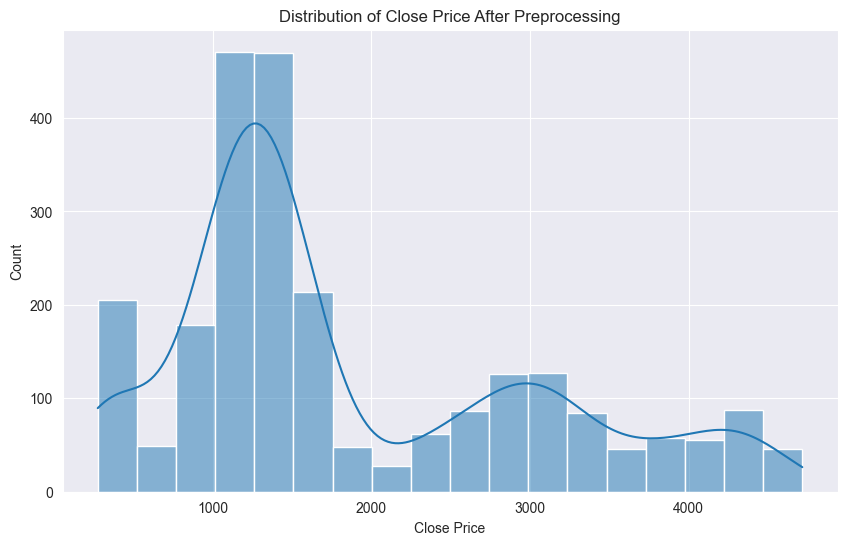

In [21]:
# Visualize the distribution of the Close Price after preprocessing
plt.figure(figsize=(10, 6))
sns.histplot(df['Close Price'], kde=True)
plt.title('Distribution of Close Price After Preprocessing')
plt.xlabel('Close Price')
plt.show()

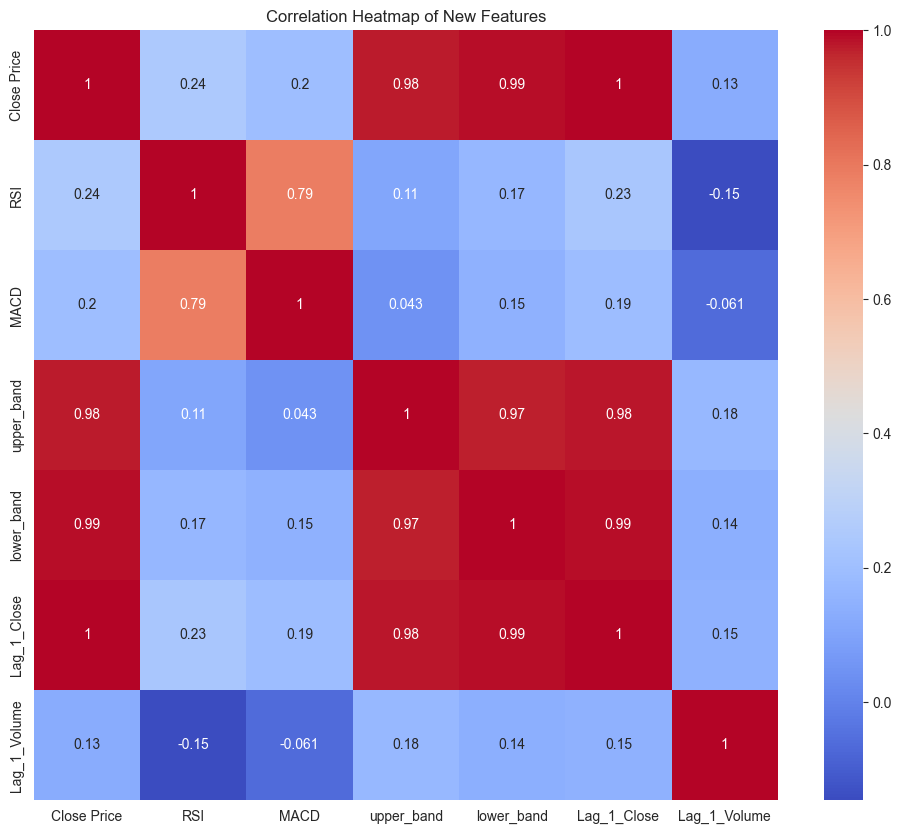

In [22]:
# Display correlation heatmap of the new features
correlation_matrix = df[['Close Price', 'RSI', 'MACD', 'upper_band', 'lower_band', 'Lag_1_Close', 'Lag_1_Volume']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of New Features')
plt.show()

# Feature Selection

In [24]:
print("\nPerforming Feature Selection:")


Performing Feature Selection:


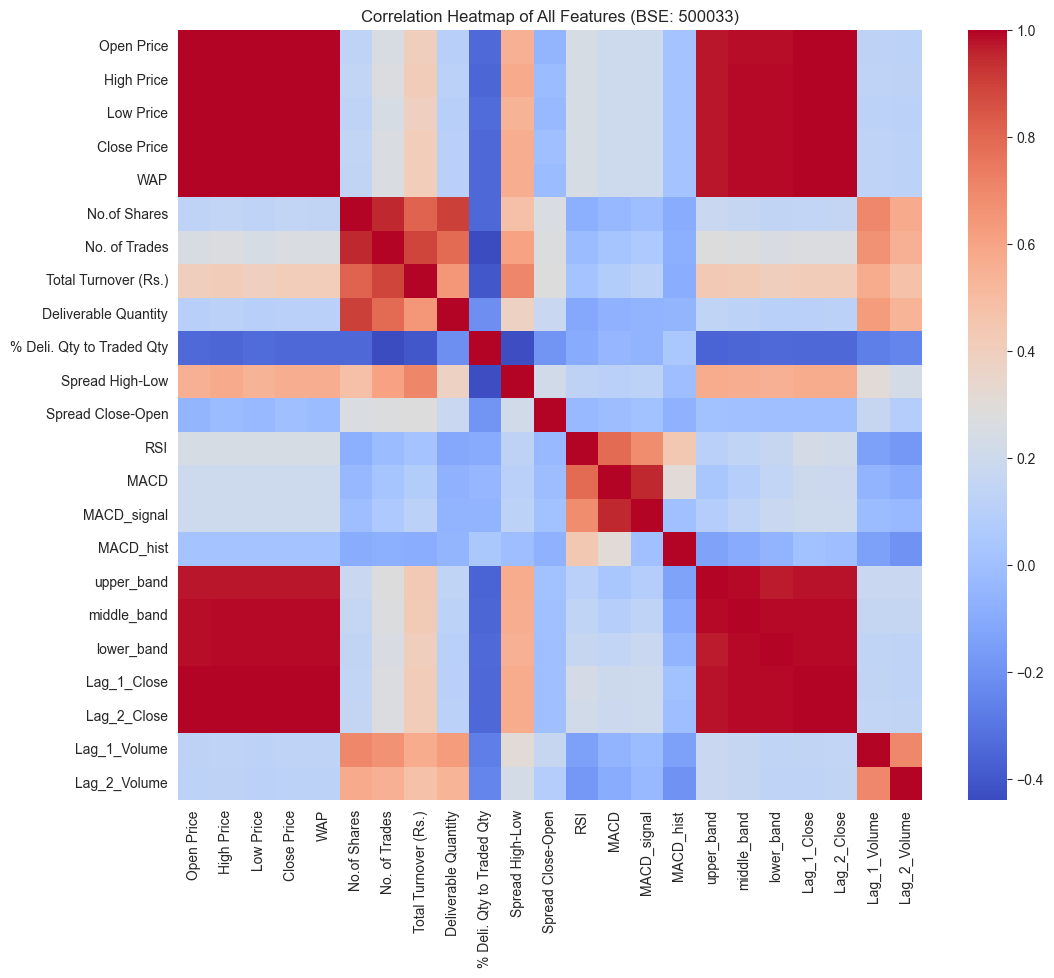

In [25]:
# 1. Correlation Analysis
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title(f'Correlation Heatmap of All Features (BSE: {selected_bse_code})')
plt.show()


Top 10 Important Features:
              feature  importance
3                 WAP    0.582901
1          High Price    0.388879
2           Low Price    0.017944
18        Lag_1_Close    0.008630
17         lower_band    0.000561
16        middle_band    0.000536
0          Open Price    0.000294
19        Lag_2_Close    0.000097
10  Spread Close-Open    0.000061
15         upper_band    0.000011


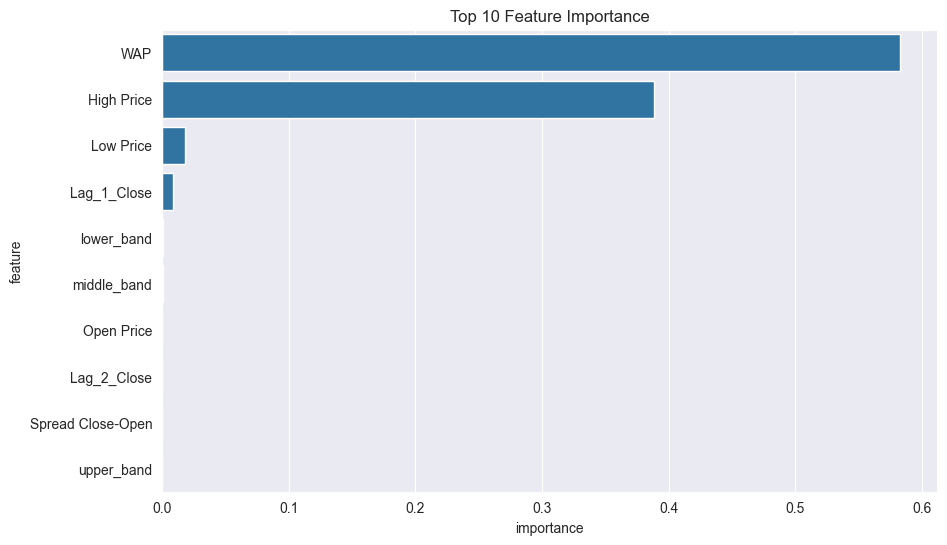

In [26]:
# 2. Feature Importance with Random Forest
X = df.drop('Close Price', axis=1)  # Features
y = df['Close Price']  # Target variable

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
print("\nTop 10 Important Features:")
print(feature_importance.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance')
plt.show()

In [27]:
# 3. Recursive Feature Elimination (RFE)
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=10)  # Select top 10 features
fit = rfe.fit(X, y)

In [28]:
selected_features = pd.DataFrame({'feature': X.columns, 'selected': fit.support_})
print("\nTop 10 Features Selected by RFE:")
print(selected_features[selected_features['selected'] == True])


Top 10 Features Selected by RFE:
              feature  selected
0          Open Price      True
10  Spread Close-Open      True
11                RSI      True
12               MACD      True
13        MACD_signal      True
14          MACD_hist      True
15         upper_band      True
16        middle_band      True
17         lower_band      True
18        Lag_1_Close      True


In [29]:
# Combine the results
combined_selection = pd.merge(feature_importance, selected_features, on='feature')
combined_selection = combined_selection.sort_values('importance', ascending=False)
print("\nCombined Feature Selection Results:")
print(combined_selection)


Combined Feature Selection Results:
                      feature  importance  selected
0                         WAP    0.582901     False
1                  High Price    0.388879     False
2                   Low Price    0.017944     False
3                 Lag_1_Close    0.008630      True
4                  lower_band    0.000561      True
5                 middle_band    0.000536      True
6                  Open Price    0.000294      True
7                 Lag_2_Close    0.000097     False
8           Spread Close-Open    0.000061      True
9                  upper_band    0.000011      True
10                        RSI    0.000010      True
11            Spread High-Low    0.000009     False
12  % Deli. Qty to Traded Qty    0.000008     False
13               Lag_1_Volume    0.000007     False
14       Deliverable Quantity    0.000007     False
15                  MACD_hist    0.000007      True
16                MACD_signal    0.000007      True
17               Lag_2_Volu

In [30]:
# Select the final set of features (e.g., top 10 from Random Forest that are also selected by RFE)
final_features = combined_selection[combined_selection['selected'] == True].head(10)['feature'].tolist()
print("\nFinal Selected Features:")
print(final_features)


Final Selected Features:
['Lag_1_Close', 'lower_band', 'middle_band', 'Open Price', 'Spread Close-Open', 'upper_band', 'RSI', 'MACD_hist', 'MACD_signal', 'MACD']


In [31]:
# Create a new dataframe with only the selected features and the target variable
df_selected = df[final_features + ['Close Price']]

In [32]:
print("\nFinal Dataset Shape:", df_selected.shape)
print(df_selected.head())


Final Dataset Shape: (2440, 11)
            Lag_1_Close   lower_band  middle_band  Open Price  \
Date                                                            
2023-07-11      2630.10  2451.169500    2608.5950     2531.00   
2023-07-10      2593.20  2449.120012    2598.9225     2578.85   
2023-07-07      2537.30  2448.298142    2594.0850     2602.05   
2023-07-06      2578.80  2459.553177    2599.7700     2545.00   
2023-07-05      2618.75  2466.405532    2601.2650     2613.05   

            Spread Close-Open   upper_band        RSI  MACD_hist  MACD_signal  \
Date                                                                            
2023-07-11              62.20  2766.020500  37.429525  81.402592  -271.483841   
2023-07-10             -41.55  2748.724988  35.055096  70.480764  -253.863650   
2023-07-07             -23.25  2739.871858  38.190003  64.903315  -237.637821   
2023-07-06              73.75  2739.986823  41.135679  62.721153  -221.957533   
2023-07-05            -12